In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the result you exported from SQL
df = pd.read_csv('roas bottom3.csv')

# 2. Let's see our 'Patients'
df.head()

,brand,total_imp,total_clicks,total_spend,total_revenue,roas,ctr_perc
0,Samsung,8529108,152800,35777.06,494599.14,13.82,1.79
1,Nike,10673391,265971,58783.42,640322.50,10.89,2.49
2,Coca-Cola,17455445,86938,31415.83,26203.00,0.83,0.50
3,Airbnb,6504186,259383,20192.05,0.00,0.00,3.99


In [37]:
# Create a filter for Airbnb
airbnb = df[df['brand'] == 'Airbnb']

# Look at the 'total_clicks' and 'total_imp'
clicks = airbnb['total_clicks'].values[0]
revenue = airbnb['total_revenue'].values[0]

print(f"Airbnb Results: {clicks} people clicked, but Revenue is ${revenue}.")

Airbnb Results: 259383 people clicked, but Revenue is $0.0.


In [39]:
if clicks > 0 and revenue == 0:
    print("DIAGNOSIS: Technical Failure. The funnel is 'Leaking' at the website level.")
    print("ACTION: Check the landing page URL and the 'Book Now' button for errors.")
elif clicks == 0:
    print("DIAGNOSIS: Creative Failure. The ads are not engaging the audience.")
    print("ACTION: Test new ad images and headlines.")

DIAGNOSIS: Technical Failure. The funnel is 'Leaking' at the website level.
ACTION: Check the landing page URL and the 'Book Now' button for errors.


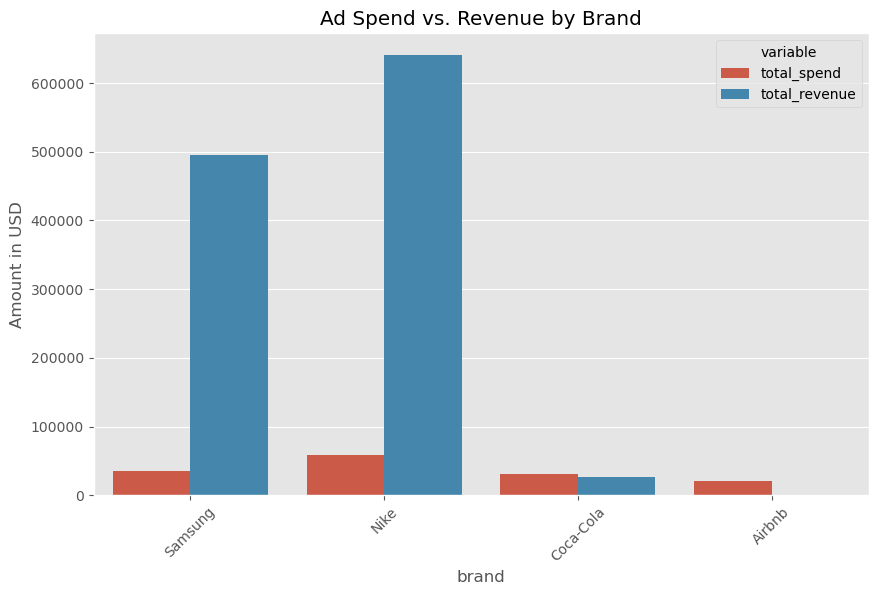

In [41]:
plt.figure(figsize=(10, 6))
# Create a bar chart showing Spend vs Revenue
df_melted = df.melt(id_vars='brand', value_vars=['total_spend', 'total_revenue'])
sns.barplot(data=df_melted, x='brand', y='value', hue='variable')

plt.title('Ad Spend vs. Revenue by Brand')
plt.ylabel('Amount in USD')
plt.xticks(rotation=45)
plt.show()

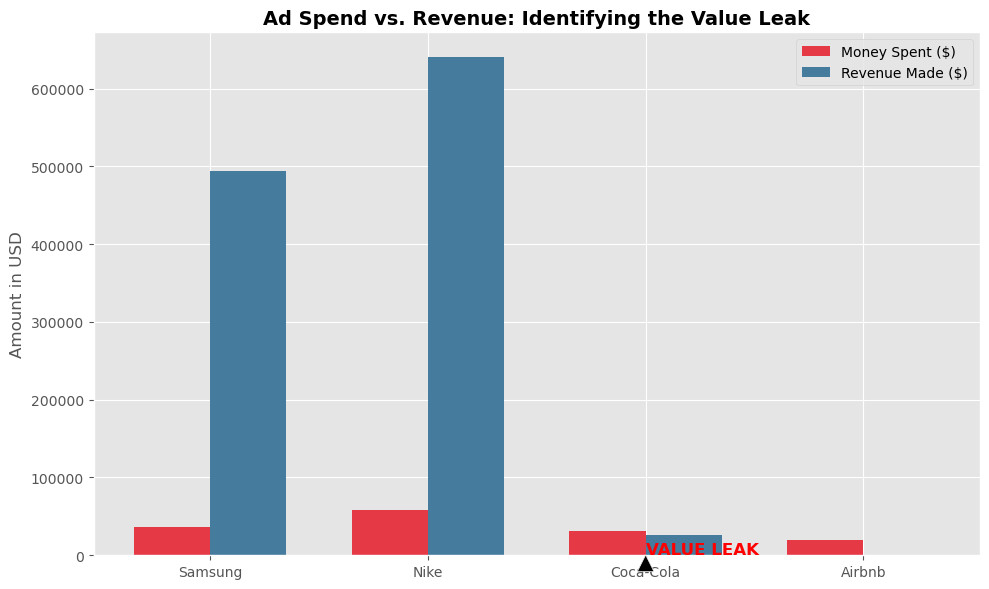

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Set the style
plt.style.use('ggplot')

# 1. Prepare the data
brands = df['brand']
spend = df['total_spend']
revenue = df['total_revenue']

x = np.arange(len(brands))  # label locations
width = 0.35  # width of the bars

# 2. Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, spend, width, label='Money Spent ($)', color='#E63946')
rects2 = ax.bar(x + width/2, revenue, width, label='Revenue Made ($)', color='#457B9D')

# 3. Add labels and title
ax.set_ylabel('Amount in USD')
ax.set_title('Ad Spend vs. Revenue: Identifying the Value Leak', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(brands)
ax.legend()

# Highlight the problem (Optional but Pro)
plt.annotate('VALUE LEAK', xy=(2, 500), xytext=(2, 2000),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, color='red', fontweight='bold')

plt.tight_layout()
plt.show()

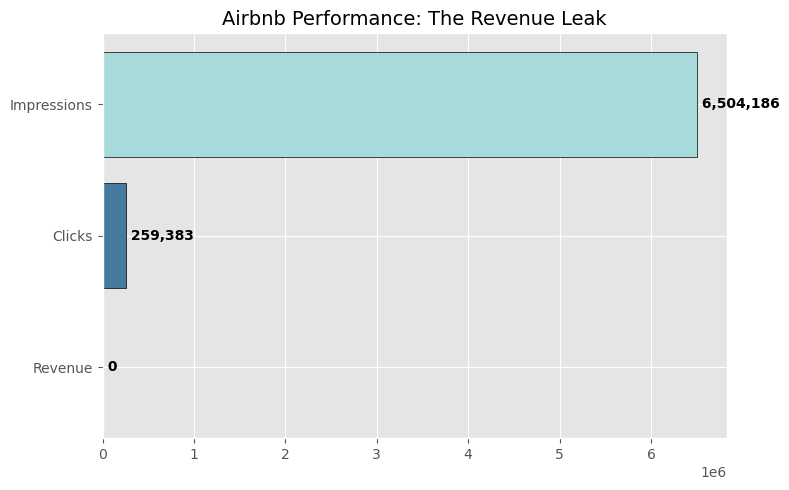

In [44]:
# 1. Check what we actually have for Airbnb
airbnb_data = df[df['brand'] == 'Airbnb'].iloc[0]

# 2. Map the stages to the columns you ACTUALLY have in your CSV
# I am removing 'total_conv' since the error says it's missing.
# We will use 'total_reve' as a proxy for the end of the funnel.

stages = ['Impressions', 'Clicks', 'Revenue']
# Update these keys to match your df.columns output exactly!
values = [airbnb_data['total_imp'], airbnb_data['total_clicks'], airbnb_data['total_revenue']]

# 3. Create the bar chart
plt.figure(figsize=(8, 5))
plt.barh(stages[::-1], values[::-1], color=['#1D3557', '#457B9D', '#A8DADC'], edgecolor='black')

# Add the numbers on the bars
for i, v in enumerate(values[::-1]):
    plt.text(v, i, f' {int(v):,}', va='center', fontweight='bold')

plt.title('Airbnb Performance: The Revenue Leak', fontsize=14)
plt.tight_layout()
plt.show()

In [53]:
# --- STEP 2: ANOMALY DETECTION ---

# Isolate the brand with the lowest ROAS
problem_brand = df[df['roas'] == 0]

# CHECK 1: Is this a lack of interest or a technical failure?
# If CTR is healthy (>2%) but Revenue is 0, the issue is post-click (Landing Page/UX).
print(problem_brand[['brand', 'total_clicks', 'ctr_perc', 'total_revenue']])

    brand  total_clicks  ctr_perc  total_revenue
3  Airbnb        259383      3.99            0.0


In [55]:
# We look at absolute numbers here to ensure the "Volume" exists.
# A 0% conversion rate is only a "Leak" if the Clicks volume is high.
print(f"Airbnb Volume Check: {clicks} clicks.")

Airbnb Volume Check: 259383 clicks.
